# Woche 13: Datenanalyse-Beispiele: MovieLens 1M Dataset
McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. 2. Auflage. Sebastopol, CA [u. a.]: O’Reilly.
- GroupLens Research bietet Film-Rating-Daten von Benutzern von MovieLens in den späten 1990er Jahren und frühen 2000er Jahren an. 
- Die Daten liefern Filmbewertungen, Filmmetadaten (Genres und Jahr) und demografische Daten über die Nutzer (Alter, Postleitzahl, Geschlecht und Beruf). 
- Solche Daten sind oft von Interesse bei der Entwicklung von Empfehlungssystemen, die auf maschinellen Lernalgorithmen basieren. 
- Obwohl wir in diesem Kurs (Lehrmittel) die eigentlichen Techniken des maschinellen Lernens nicht untersuchen, soll hier gezeigt werden, wie man solche Datensätze in eine geeignete Form bringt. 
- Das MovieLens 1M-Dataset enthält gut 1 Million Bewertungen von etwa 6'000 Nutzern von knapp 4'000 Filmen. Es ist auf drei Tabellen verteilt: Bewertungen, Benutzerinformationen und Filminformationen. 
- Nach dem Extrahieren der Daten aus der ZIP-Datei können wir jede Tabelle mit `pandas.read_table` in ein Pandas-DataFrame-Objekt laden.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%autosave 0

Autosave disabled


In [15]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('../../datasets/movielens/users.dat', sep='::',engine='python',
                      header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('../../datasets/movielens/ratings.dat', sep='::',engine='python',
                        header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('../../datasets/movielens/movies.dat', sep='::', engine='python',
                       header=None, names=mnames, encoding='latin-1')

# c engine erlaubt nur 1 separator zeichen anstatt zwei "sep='::'"
# c engine wird verwendet, da diese die schnellste ist
# um dem problem zu entgehen, kann die engine='python' angegeben werden
# encoding='latin-1'

In [11]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


Codierungen:
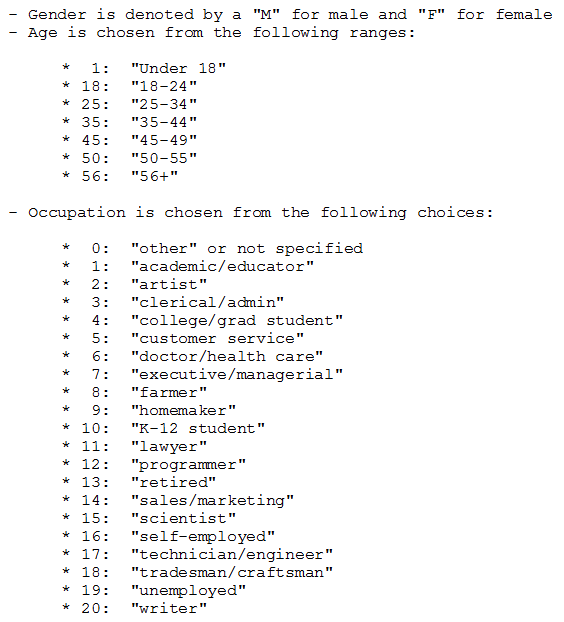

In [3]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [16]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


- Die Analyse der über drei Tabellen verteilten Daten ist keine einfache Aufgabe. Angenommen, wir wollten Durchschnittsbewertungen für einen bestimmten Film nach Geschlecht und Alter berechnen. 
- Es ist viel einfacher, wenn alle Daten in einer einzigen Tabelle zusammengefasst sind. 
- Mit der `merge`-Funktion von Pandas werden zuerst `ratings` mit `users` zusammengeführt und dann das Resultat mit den `movies`-Daten zusammengeführt. 
- `pandas` merkt selber basierend auf überlappenden Spaltennamen, welche Spalten als Merge- (oder Join-) Schlüssel verwendet werden sollen:

In [20]:
df = users.merge(ratings).merge(movies)
df.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   gender      1000209 non-null  object
 2   age         1000209 non-null  int64 
 3   occupation  1000209 non-null  int64 
 4   zip         1000209 non-null  object
 5   movie_id    1000209 non-null  int64 
 6   rating      1000209 non-null  int64 
 7   timestamp   1000209 non-null  int64 
 8   title       1000209 non-null  object
 9   genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


Um für jeden Film eine mittlere Filmbewertung nach Geschlecht zu erhalten, können wir die `pivot_table`-Methode verwenden:

In [23]:
mean_ratings_all = df.pivot_table(values='rating', index='title', columns='gender') 
# index = variable mit vielen werten
# columns = variable mt wenigen werten
mean_ratings_all.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


Es geht aber auch mit `groupby`:

In [34]:
# titel mit hierarchischer index => von einem long table zu einem wide table => .unstack() wird zur wide table
df.groupby(['title', 'gender']).rating.mean().unstack().head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


Anzahl Ratings pro Film:

In [36]:
number_ratings = df.groupby('title').size()
number_ratings.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [39]:
# Nur Filme mit mindestens 250 Ratings:
active_titles = number_ratings >= 250
active_titles.value_counts()

False    2490
True     1216
dtype: int64

In [44]:
# Mittleres Rating der Filme mit mindestens 250 Ratings:
mean_ratings = mean_ratings_all[active_titles].copy()
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


Tiefstes Rating der aktiven Titel:

In [52]:
mean_ratings.min()

1.574468085106383

In [60]:
# Welcher Titel ist es bei F? 
mean_ratings[mean_ratings.F == mean_ratings.F.min()]

gender,F,M
title,,
Battlefield Earth (2000),1.574468,1.616949


In [61]:
# Eleganter und gerade für beide Geschlechter:
mean_ratings.idxmin()

gender
F    Battlefield Earth (2000)
M    Battlefield Earth (2000)
dtype: object

In [62]:
mean_ratings.idxmax()

gender
F    Close Shave, A (1995)
M    Godfather, The (1972)
dtype: object

In [67]:
mean_ratings.loc[mean_ratings.idxmax()]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Godfather, The (1972)",4.314700,4.583333


Einen Filmnamen (Index) ändern:

In [ ]:
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                                          'Seven Samurai (Shichinin no samurai) (1954)'})

Um die besten Filme unter weiblichen Zuschauern zu sehen, können wir nach der `F`-Spalte in absteigender Reihenfolge sortieren:

In [73]:
mean_ratings.F.sort_values(ascending=False)

title
Close Shave, A (1995)                                     4.644444
Wrong Trousers, The (1993)                                4.588235
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)             4.572650
Wallace & Gromit: The Best of Aardman Animation (1996)    4.563107
Schindler's List (1993)                                   4.562602
                                                            ...   
Avengers, The (1998)                                      1.915254
Speed 2: Cruise Control (1997)                            1.906667
Rocky V (1990)                                            1.878788
Barb Wire (1996)                                          1.585366
Battlefield Earth (2000)                                  1.574468
Name: F, Length: 1216, dtype: float64

In [74]:
mean_ratings.sort_values(by='M', ascending=False)

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
...,...,...
Speed 2: Cruise Control (1997),1.906667,1.863014
Superman IV: The Quest for Peace (1987),2.216216,1.847458
Super Mario Bros. (1993),2.163636,1.820339


Meinungsverschiedenheiten im Rating messen:

In [75]:
# differenz: rating männer - rating frauen
# positive zahl = männer mögen film mehr
# negative zahl = frauen mögen film mehr

mean_ratings['dissentMF'] = mean_ratings.M - mean_ratings.F

In [79]:
# Die 10 Filme, bei denen die Bewertung der Frauen gegenüber den Männern am höchsten war:
mean_ratings.sort_values(by='dissentMF', ascending=True).head(10)

gender,F,M,dissentMF
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [82]:
# Umgekehrte Reihenfolge: 
# Die 10 Filme, bei denen die Bewertung der Männer gegenüber den Frauen am höchsten war:
mean_ratings.sort_values(by='dissentMF', ascending=False).head(10)

gender,F,M,dissentMF
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [91]:
# Die 10 Filme mit den kleinsten Geschlechter-Unterschieden im Rating:
mean_ratings['abs_dissent'] = np.abs(mean_ratings.dissentMF)
mean_ratings.sort_values(by='abs_dissent', ascending=True).head(10)

# best date movies, since the difference is the smallest

gender,F,M,dissentMF,abs_dissent
title,,,,
Tender Mercies (1983),3.905405,3.905263,-0.000142,0.000142
"Mystery, Alaska (1999)",3.434783,3.435780,0.000997,0.000997
Jerry Maguire (1996),3.758315,3.759424,0.001109,0.001109
Trainspotting (1996),3.958974,3.960432,0.001457,0.001457
Robin Hood: Prince of Thieves (1991),3.161290,3.163347,0.002056,0.002056
Dune (1984),3.354331,3.356495,0.002165,0.002165
Fatal Attraction (1987),3.668050,3.670232,0.002182,0.002182
Miracle on 34th Street (1947),3.959016,3.961240,0.002224,0.002224
Indiana Jones and the Temple of Doom (1984),3.674312,3.676568,0.002256,0.002256


In [90]:
# Die 10 Filme mit den grössten Geschlechter-Unterschieden im Rating:
mean_ratings.sort_values(by='abs_dissent', ascending=False).head(10)

gender,F,M,dissentMF,abs_dissent
title,,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359,0.676359
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985,0.611985
Grease (1978),3.975265,3.367041,-0.608224,0.608224


- Angenommen wir möchten diejenigen Filme, die *unabhängig vom Geschlecht* die meisten Meinungsverschiedenheiten zwischen den Zuschauern hervorrufen. 
- Meinungsverschiedenheiten können anhand der *Varianz* oder *Standardabweichung* der Ratings gemessen werden:

In [94]:
# Standardabweichung der Ratings gruppiert nach Titel:
std_ratings = df.rating.groupby(df.title).std()
# Nur Filme mit mind. 250 Ratings wählen:
active_std_ratings = std_ratings[active_titles]
# Series in absteigender Reihenfolge sortieren:
active_std_ratings.sort_values(ascending=False).head(10)

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [95]:
# Bei diesen 10 Filmen gab es am wenigsten Meinungsunerschiede:
active_std_ratings.sort_values(ascending=True).head(10)

title
Close Shave, A (1995)                            0.667143
Rear Window (1954)                               0.688946
Great Escape, The (1963)                         0.692585
Shawshank Redemption, The (1994)                 0.700443
Wrong Trousers, The (1993)                       0.708666
Raiders of the Lost Ark (1981)                   0.725647
North by Northwest (1959)                        0.732515
Hustler, The (1961)                              0.737298
Double Indemnity (1944)                          0.740793
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)    0.740924
Name: rating, dtype: float64

In [102]:
df.title[df.title.str.lower().str.contains('dumber')].unique()

array(['Dumb & Dumber (1994)'], dtype=object)

Untersuchung von Dumb & Dumber (1994)

In [108]:
dumb = df[df.title == 'Dumb & Dumber (1994)'].copy()
dumb.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
559223,11,F,25,1,04093,231,3,978904192,Dumb & Dumber (1994),Comedy
559224,15,M,25,7,22903,231,2,978198790,Dumb & Dumber (1994),Comedy
559225,22,M,18,15,53706,231,3,978154051,Dumb & Dumber (1994),Comedy
559226,26,M,25,7,23112,231,1,978139639,Dumb & Dumber (1994),Comedy
559227,48,M,25,4,92107,231,4,978013888,Dumb & Dumber (1994),Comedy


In [109]:
# Geschlechterunterschiede:
dumb.groupby('gender').rating.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,149.0,2.697987,1.354196,1.0,1.0,3.0,4.0,5.0
M,511.0,3.336595,1.277333,1.0,3.0,3.0,4.0,5.0


<AxesSubplot:xlabel='gender'>

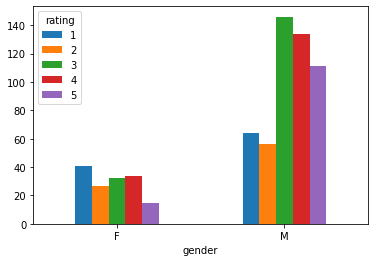

In [117]:
# gruppiertes säulendiagramm
dumb.groupby('gender').rating.value_counts().unstack().plot(kind='bar', rot=0)

<AxesSubplot:xlabel='gender'>

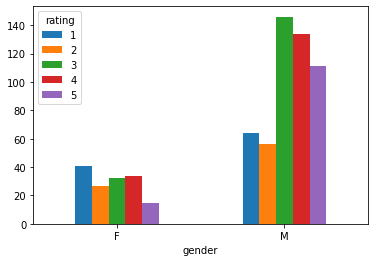

In [119]:
# eleganter:
pd.crosstab(dumb.gender, dumb.rating).plot(kind='bar', rot=0)

<AxesSubplot:xlabel='gender'>

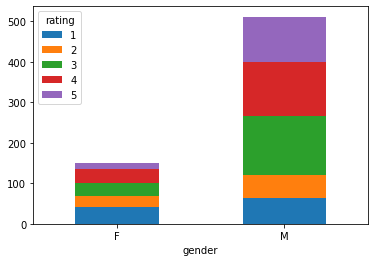

In [122]:
# gestapeltes säulendiagramm
pd.crosstab(dumb.gender, dumb.rating).plot(kind='bar', stacked=True, rot=0)

<AxesSubplot:xlabel='gender'>

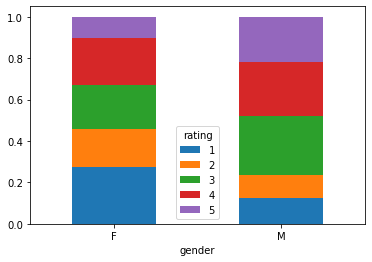

In [131]:
# bedingte häufigkeitsverteilung: normalize='index' => auf dumb.gender normalisieren (normalize='column' wäre auf ratings)
pd.crosstab(dumb.gender, dumb.rating, normalize='index').plot(kind='bar', stacked=True, rot=0)

Ratings der drei "Naked Gun"-Filme

In [144]:
mean_ratings[mean_ratings.index.str.contains('Naked Gun')].sort_values(by='F', ascending=False)

gender,F,M,dissentMF,abs_dissent
title,,,,
"Naked Gun: From the Files of Police Squad!, The (1988)",3.395161,3.742958,0.347796,0.347796
"Naked Gun 2 1/2: The Smell of Fear, The (1991)",2.802469,3.154286,0.351817,0.351817
Naked Gun 33 1/3: The Final Insult (1994),2.671875,2.939655,0.267780,0.267780


Ratings der "Rocky"-Filme

In [150]:
mean_ratings[mean_ratings.index.str.contains('Rocky') 
             & ~mean_ratings.index.str.contains('Horror')]

gender,F,M,dissentMF,abs_dissent
title,,,,
Rocky (1976),3.711538,3.995657,0.284118,0.284118
Rocky II (1979),2.741379,3.242894,0.501515,0.501515
Rocky III (1982),2.361702,2.943503,0.581801,0.581801
Rocky IV (1985),2.560976,2.655689,0.094713,0.094713
Rocky V (1990),1.878788,2.132780,0.253992,0.253992
